

# Cálculo integral

Una integral indefinida es una integral sin límites, con infinito número de resultados posibles (infinitas funciones resultado, cuya derivada es el integrando).

\begin{equation} \int x^2\, dx = \frac{x^3}{3} + C \end{equation}

Una integral definida, en cambio tiene límites de integración, por ejemplo:

\begin{equation} \int_0^1 x^2\, dx = \frac{1}{3}. \end{equation}

Está demostrado que el resultado, numérico, está relacionado con el cálculo geométrico de áreas.

## Interpretación Geométrica

Por simplicidad, supongamos que tenemos una función $f(x)$ no negativa (su valor de salida $f(x)$ es mayor o igual a cero para todo valor de su entrada $x$).  Queremos entender numéricamente: ¿cuál es el área contenida entre la gráfica de la $f(x)$ y el eje $x$?

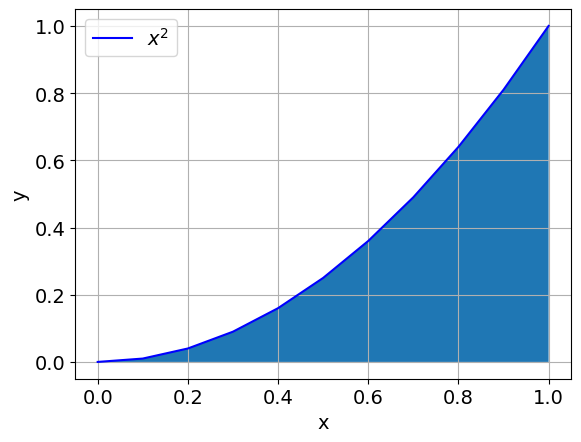

In [ ]:
# Importamos las bibliotecas básicas
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return x**2

a = 0
b = 1
n = 11 # linspace genera n+1 valores de x
x = np.linspace(a, b, n)
y = x**2
dx = (b-a)/(n-1)
#print(x)
#print(x[0:x.size-1])

# Plotear (graficar) f(x)
plt.rc('font', size=14)
plt.plot(x, y, 'b', label='$x^2$')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.legend()
plt.fill_between(x,f(x))
plt.show()

## Integración naive (método de rectángulos)

Para una integración "cruda", aplicamos la **Suma de Riemann**:
\begin{align}
  \sum_{i=1}^n f(x_i) \Delta x &= \Delta x \cdot f(x_1) + \Delta x \cdot f(x_2)+ \cdots + \Delta x \cdot f(x_n)\\
  &=\Delta x \left(f(x_1)+f(x_2)+\cdots+f(x_n)\right)
\end{align}

Recordemos que la letra griega $\Sigma$ significa "la suma de" todos los términos de la forma $f(x_i)\cdot \Delta x$. En nuestro caso, eso representa la suma de las áreas de todos los rectángulos cuyas bases tienen longitud $\Delta x$ y cuyas alturas varían según el valor de $f(x_i)$.

In [ ]:
plt.plot(x, y, 'b', label='$x^2$')

# Plot the rectangles
plt.bar(x[0:x.size-1] ,y[1:x.size], dx, align='edge', alpha=0.5, edgecolor='k')

# Customize the plot
plt.xlabel('x')
plt.ylabel('y')
plt.title('Riemann Sum Approximation')
plt.grid(True)
plt.fill_between(x,f(x))
plt.legend()

El área encima de la gráfica de $f(x)$ es un error correspondiente al mismatch entre los rectángulos y la curva. Sin embargo, a más rectángulos, menos error.

In [ ]:
# prompt: Compute dx*f(x(i)) for all i that are elements of vector x

# Assuming 'x', 'y', and 'dx' are defined as in the provided code
# a = 0
# b = 1
# n = 11  # linspace generates n+1 values of x
# x = np.linspace(a, b, n)
# y = x**2
# dx = (b-a)/(n-1)

# Compute dx * f(x(i)) for all i
result1 = dx * y[1:x.size]  # Los valores de i son los f(x(i)), excepto el primer elemento
result2 = dx * y[0:x.size-1]  # Los valores de i son los f(x(i)), excepto el ultimo elemento
result = 0.5 * (result1 + result2)
area = np.sum(result)
print("Area:", area)

## Integración numérica o cuadratura

Una función más "limpia" de usar podría ser la función `scipy.integrate.quad` (la abreviatura viene de *quadrature*, otra forma de llamar a la integración) que ya solicita la función, el límite inferior y el límite superior.

In [ ]:
from scipy.integrate import quad
def f(x):
  return x**2

xlo = 0
xhi = 1

I_quad, err = quad(f, xlo, xhi)

print("I_quad = ", I_quad)
print("error = ", err)

La [*cuadratura*](https://es.wikipedia.org/wiki/Integraci%C3%B3n_num%C3%A9rica) es el proceso de integración numérica que *trata de reproducir fielmente la curvatura de* $f(x)$. Los métodos más conocidos son: la **regla del punto medio**, la **regla del trapecio**, la **regla de Simpson**, etc.